<a href="https://colab.research.google.com/github/GeorgeShmelin/Masterschool_projects/blob/main/CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# !pip install keras

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.datasets import mnist

%matplotlib inline

# Data

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


select 10,000 samples from index 5,000 to 15,000

In [ ]:
n = 15000
start = 5000
end = start + n

train_images = train_images[start:end]
train_labels = train_labels[start:end]

In [ ]:
# looking at the train labels
train_labels

array([[6],
       [7],
       [9],
       ...,
       [7],
       [2],
       [5]], dtype=uint8)

In [ ]:
print ("The number of training examples is: ", train_images.shape[0])
print ("The number of test examples is: ", test_images.shape[0])
print ("The size of every img is: ", train_images.shape[1:])
num_classes=len(np.unique(train_labels))
print ("The number of classes is: ", num_classes)

The number of training examples is:  15000
The number of test examples is:  10000
The size of every img is:  (32, 32, 3)
The number of classes is:  10


In [ ]:
# Reshaping the input to be a vector instead of an array
dim_array=np.prod(train_images.shape[1:])
train_data=train_images.reshape(train_images.shape[0],dim_array)
test_data=test_images.reshape(test_images.shape[0],dim_array)

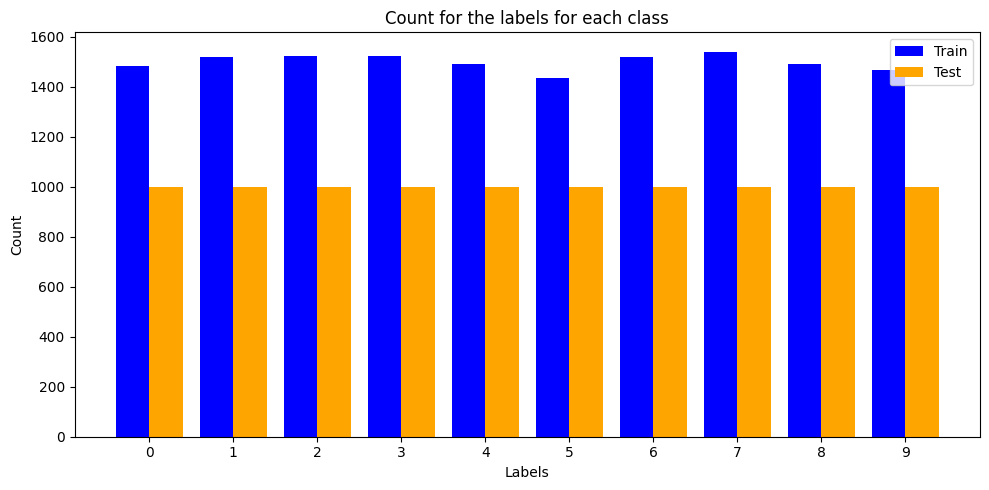

In [ ]:
# Count label occurrences
train_counts = pd.Series(train_labels.flatten()).value_counts().sort_index()
test_counts = pd.Series(test_labels.flatten()).value_counts().sort_index()

# Plot label distribution
labels = train_counts.index
x = np.arange(len(labels))
bar_width = 0.4

plt.figure(figsize=(10, 5))
plt.bar(x, train_counts, width=bar_width, label='Train', color='blue')
plt.bar(x + bar_width, test_counts, width=bar_width, label='Test', color='orange')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count for the labels for each class')
plt.xticks(x + bar_width / 2, labels)
plt.legend()
plt.tight_layout()
plt.show()

looks reasonable

In [ ]:
train_images.shape

(15000, 32, 32, 3)

I see that have 10k 32x32 images that have 3 channels, meaning that these are RGB images. This is for the training portion of data. Testing portion will be the same.

In [ ]:
test_images.shape

(10000, 32, 32, 3)

## data overview

build a list that will contain the classes

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_image(i):
    image = train_images[i]
    label = train_labels.flatten()[i]

    cl = classes[label]

    plt.imshow(image)
    plt.title(cl)

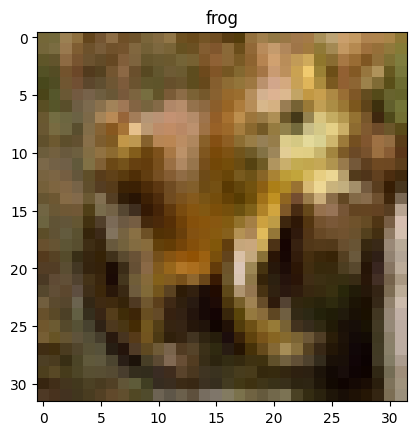

In [ ]:
plot_image(2)

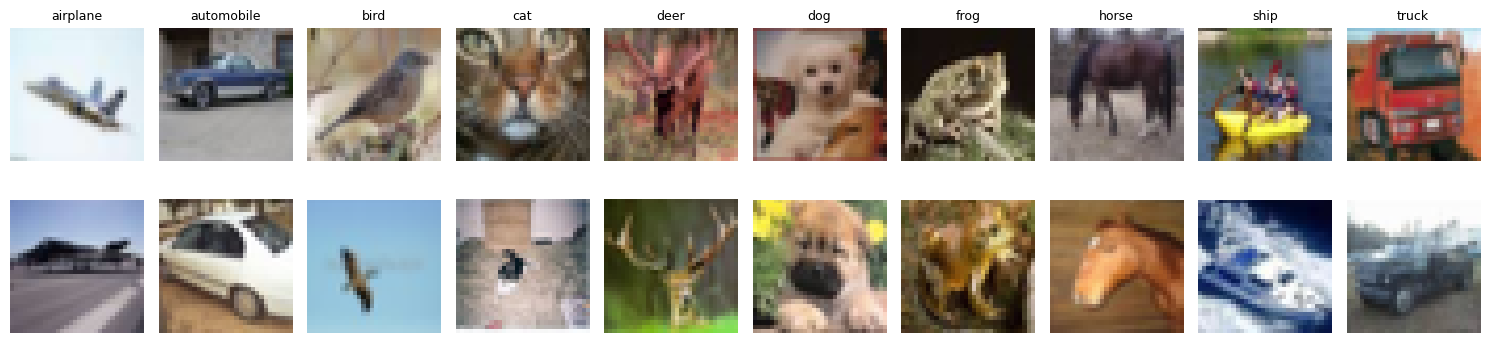

In [ ]:
# Flatten labels for indexing
flat_labels = train_labels.flatten()

# Get one example for each class (twice)
top_indices = []
bottom_indices = []

for class_idx in range(10):
    indices = np.where(flat_labels == class_idx)[0]
    top_indices.append(indices[0])       # First image of the class
    bottom_indices.append(indices[1])    # Second image of the class

# Plot 2 rows × 10 columns
plt.figure(figsize=(15, 4))
for col in range(10):
    # Top row (with label)
    plt.subplot(2, 10, col + 1)
    plt.imshow(train_images[top_indices[col]])
    plt.title(classes[col], fontsize=9)
    plt.axis('off')

    # Bottom row (no label)
    plt.subplot(2, 10, 10 + col + 1)
    plt.imshow(train_images[bottom_indices[col]])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Model

In [ ]:
# Convert images to png (scale from 0 to 1)
train_data=train_data.astype('float32')
test_data=test_data.astype('float32')

train_data/=255
test_data/=255

In [ ]:
#Converting labels to one-hot encoding form
from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [ ]:
print("Before encoding",train_labels[5])
print("After encoding",train_labels_one_hot[5])

Before encoding [2]
After encoding [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


my model

In [ ]:
from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=[dim_array,]))
model.add(Dropout(0.1))
# model.add(Dense(512,activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=80, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.1599 - loss: 2.2779 - val_accuracy: 0.3032 - val_loss: 1.9339
Epoch 2/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.3079 - loss: 1.9231 - val_accuracy: 0.3391 - val_loss: 1.8545
Epoch 3/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.3502 - loss: 1.8208 - val_accuracy: 0.3528 - val_loss: 1.7931
Epoch 4/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.3703 - loss: 1.7665 - val_accuracy: 0.3669 - val_loss: 1.7556
Epoch 5/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.3799 - loss: 1.7301 - val_accuracy: 0.3776 - val_loss: 1.7426
Epoch 6/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.3943 - loss: 1.6884 - val_accuracy: 0.3836 - val_loss: 1.6977
Epoch 7/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4143 - loss: 1.6504 - val_accuracy: 0.4095 - val_loss: 1.6573
Epoch 8/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4185 - loss: 1.6228 - val_accuracy: 0.4181 - 

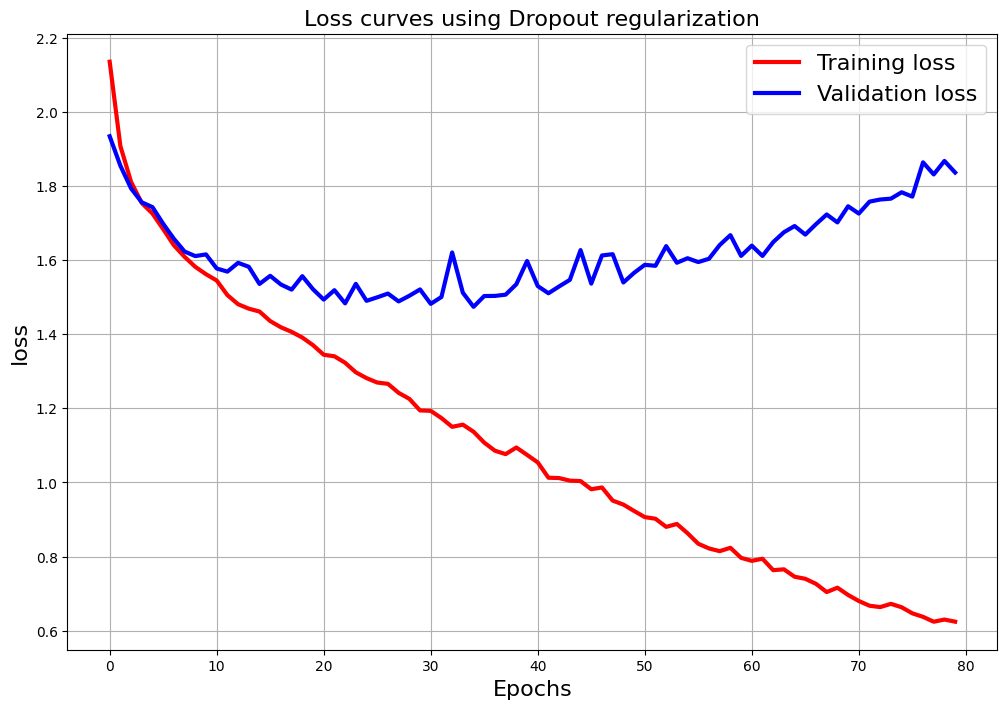

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

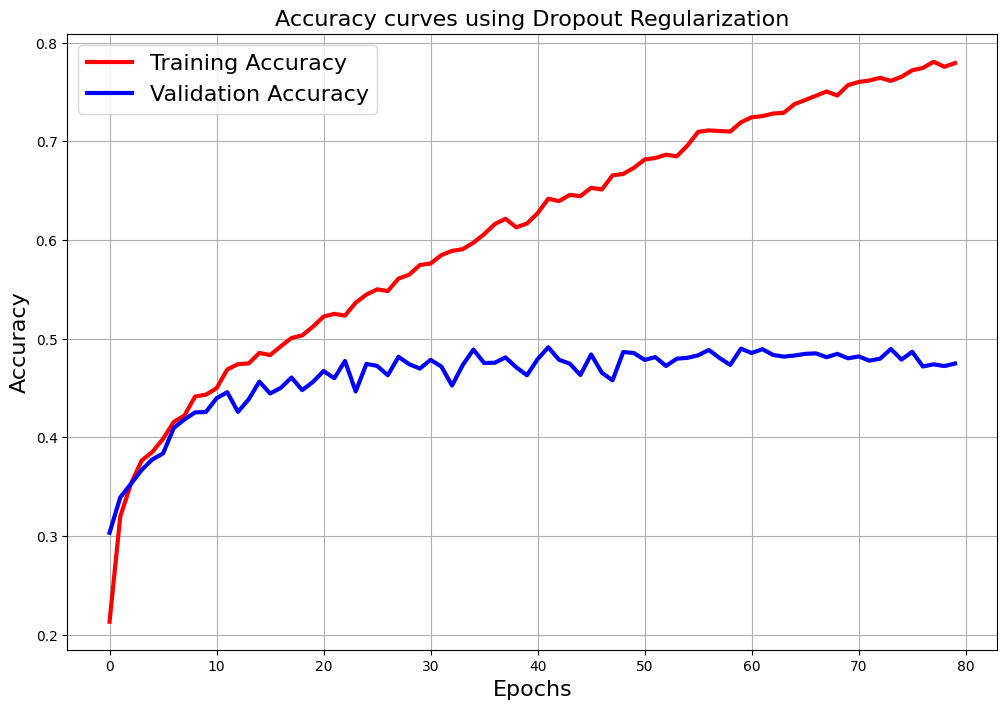

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=[dim_array,]))
#model.add(Dropout(0.2))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Converting labels to one-hot encoding form
from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=160, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.1047 - loss: 2.3557 - val_accuracy: 0.1252 - val_loss: 2.3286
Epoch 2/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.0996 - loss: 2.3283 - val_accuracy: 0.1000 - val_loss: 2.3132
Epoch 3/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.0975 - loss: 2.3180 - val_accuracy: 0.1000 - val_loss: 2.3214
Epoch 4/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.1013 - loss: 2.3230 - val_accuracy: 0.1000 - val_loss: 2.3121
Epoch 5/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.0961 - loss: 2.3281 - val_accuracy: 0.1000 - val_loss: 2.3062
Epoch 6/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.0917 - loss: 2.3129 - val_accuracy: 0.1000 - val_loss: 2.3157
Epoch 7/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.1055 - loss: 2.3194 - val_accuracy: 0.1000 - val_loss: 2.3082
Epoch 8/160
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.0965 - loss: 2.3144 - val_acc

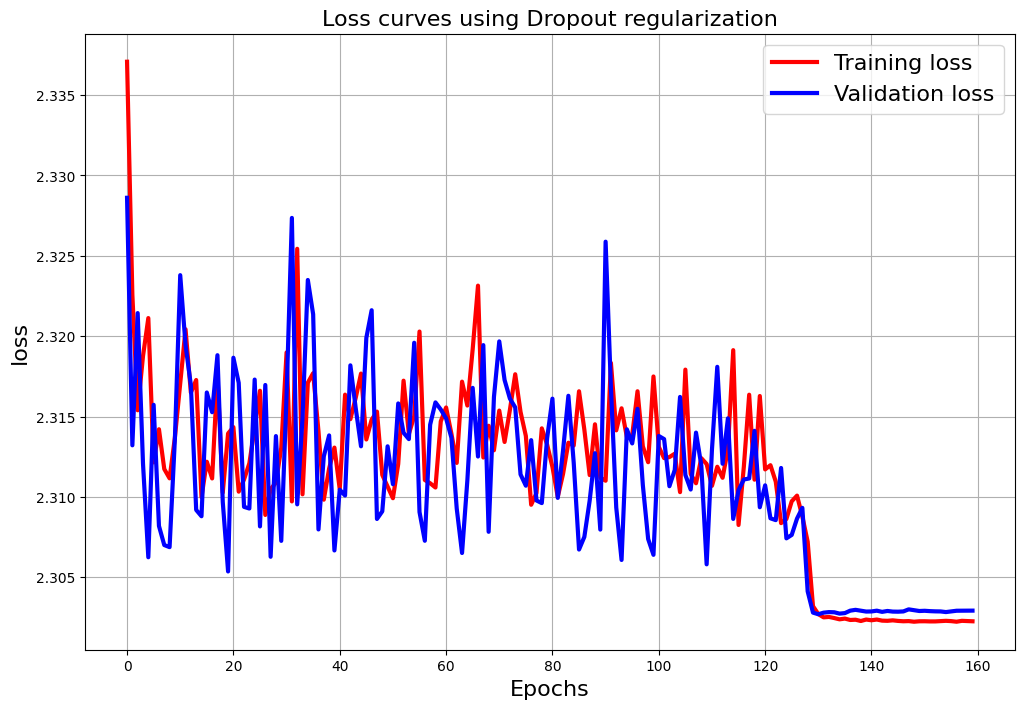

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

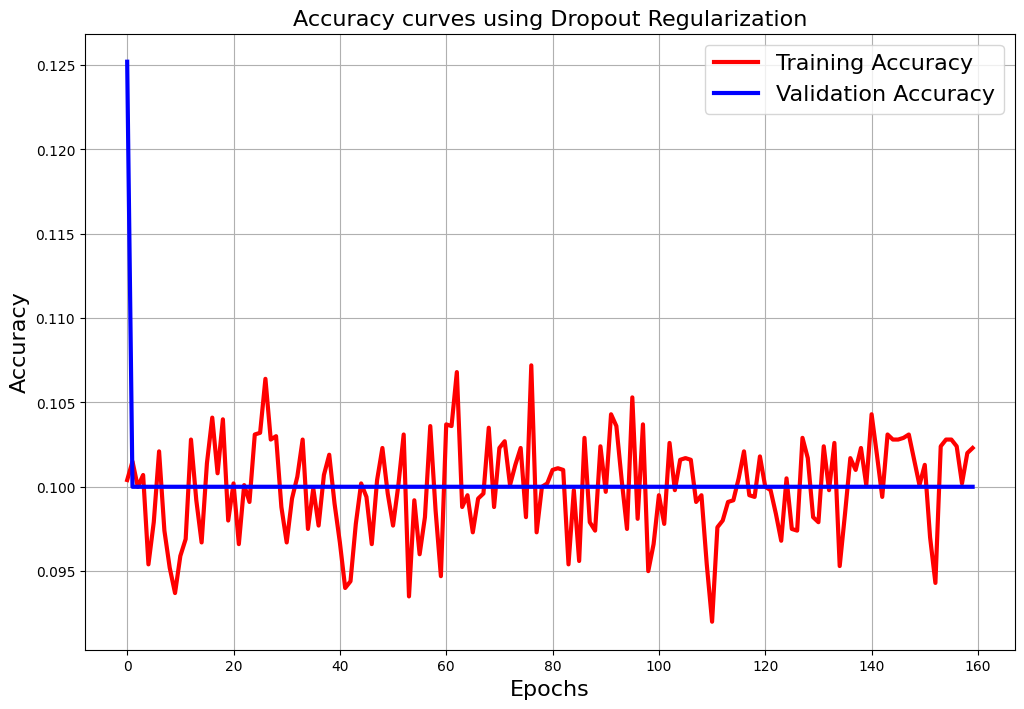

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=[dim_array,]))
#model.add(Dropout(0.1))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='sigmoid'))
#model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Converting labels to one-hot encoding form
from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.1007 - loss: 2.3806 - val_accuracy: 0.1000 - val_loss: 2.3250
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.1205 - loss: 2.3029 - val_accuracy: 0.1582 - val_loss: 2.1638
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.1702 - loss: 2.1452 - val_accuracy: 0.1782 - val_loss: 2.0673
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.2087 - loss: 2.0442 - val_accuracy: 0.2277 - val_loss: 1.9888
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.2449 - loss: 1.9828 - val_accuracy: 0.2646 - val_loss: 1.9593
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.2653 - loss: 1.9510 - val_accuracy: 0.2857 - val_loss: 1.9160
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.2778 - loss: 1.9276 - val_accuracy: 0.2804 - val_loss: 1.8989
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.2827 - loss: 1.9225 - val_accu

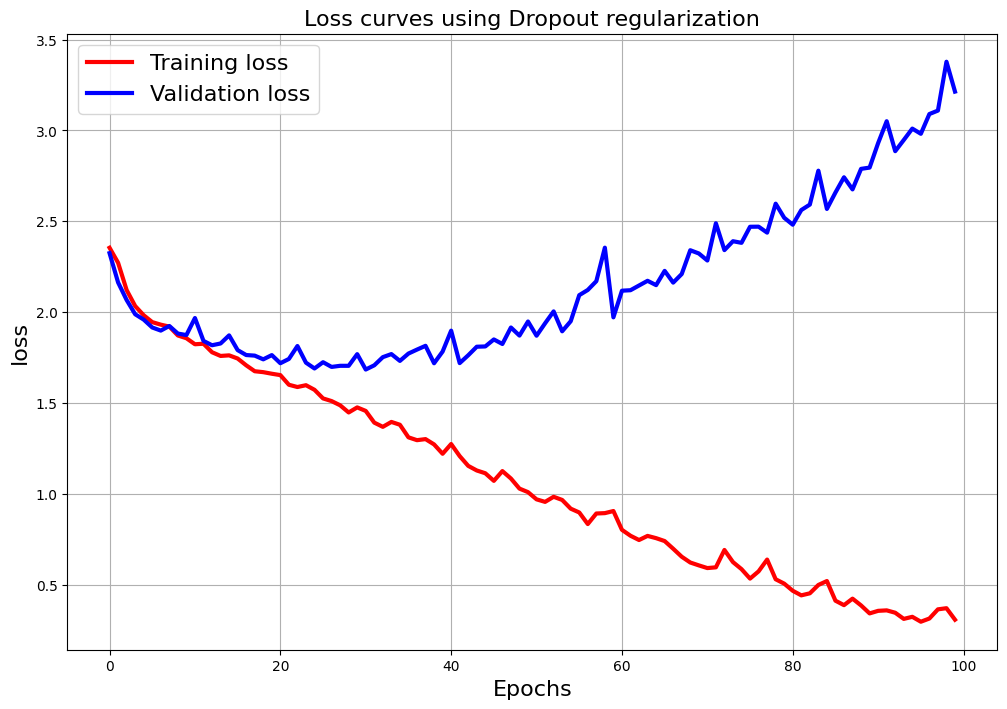

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

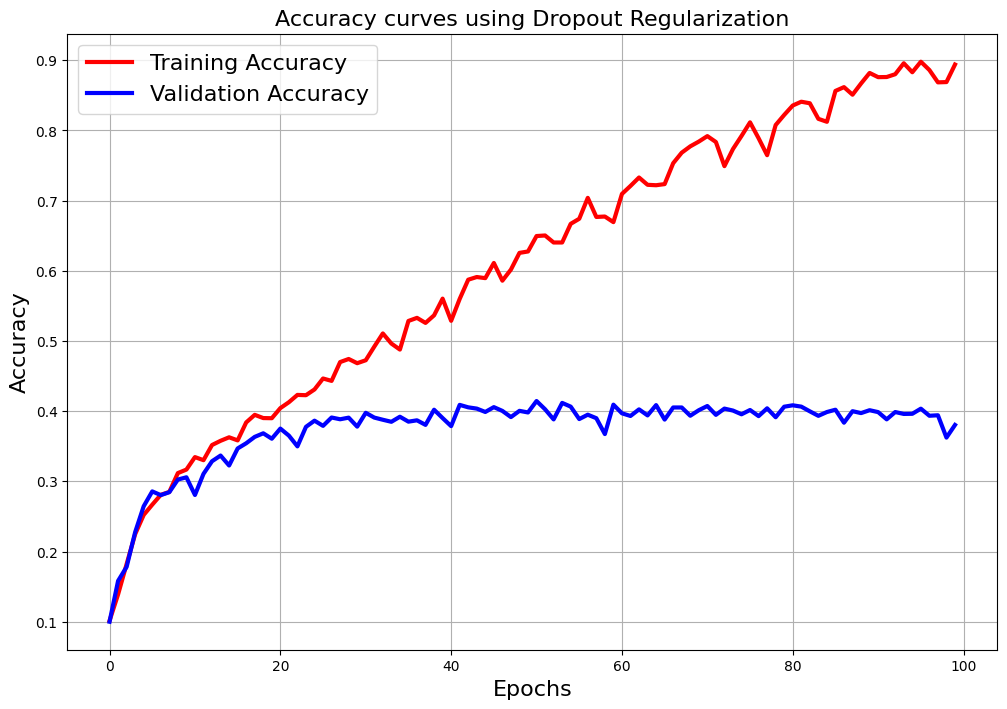

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
#model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.1183 - loss: 2.3842 - val_accuracy: 0.2164 - val_loss: 2.1015
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.2130 - loss: 2.1012 - val_accuracy: 0.2275 - val_loss: 1.9998
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.2531 - loss: 2.0159 - val_accuracy: 0.2942 - val_loss: 1.9334
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.3130 - loss: 1.8992 - val_accuracy: 0.3018 - val_loss: 1.8959
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.3131 - loss: 1.8501 - val_accuracy: 0.3405 - val_loss: 1.8378
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.3450 - loss: 1.7942 - val_accuracy: 0.3418 - val_loss: 1.8091
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.3566 - loss: 1.7806 - val_accuracy: 0.3345 - val_loss: 1.8049
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.3603 - loss: 1.7627 - val_accu

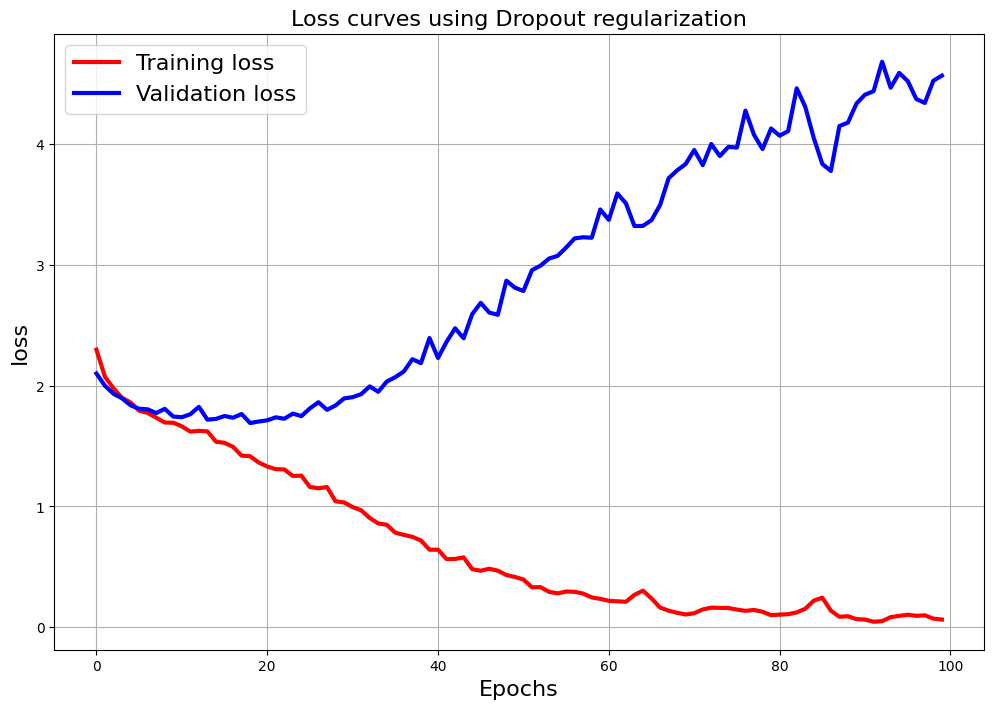

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

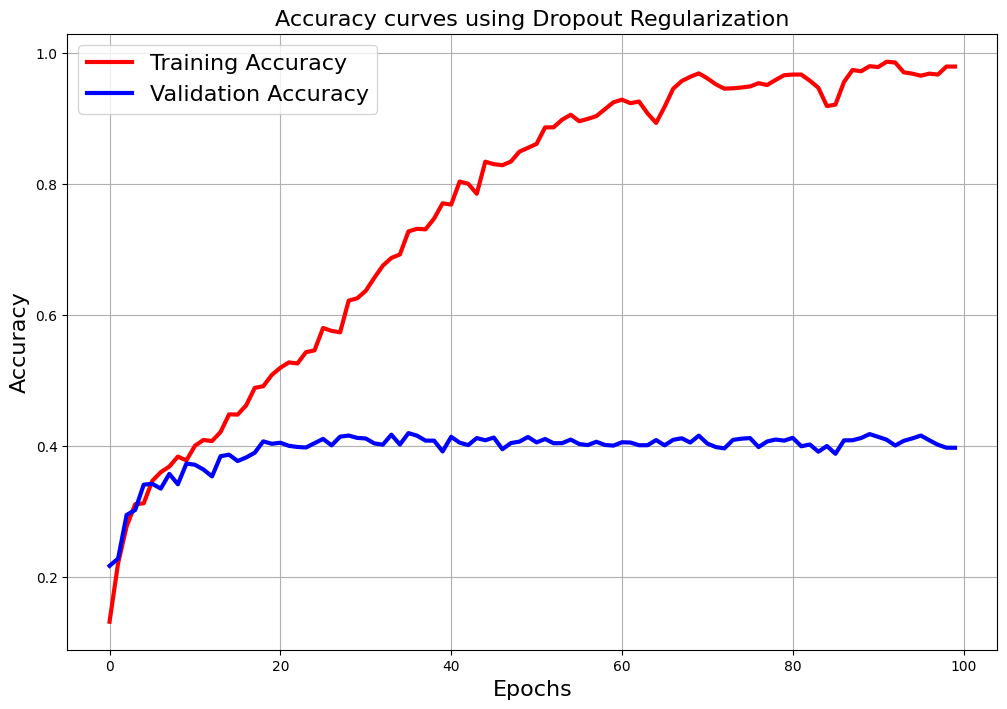

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.1225 - loss: 2.3008 - val_accuracy: 0.1811 - val_loss: 2.1496
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.1869 - loss: 2.1339 - val_accuracy: 0.2180 - val_loss: 2.0652
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.2083 - loss: 2.0878 - val_accuracy: 0.2679 - val_loss: 1.9974
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.2598 - loss: 2.0076 - val_accuracy: 0.2738 - val_loss: 1.9383
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - accuracy: 0.2822 - loss: 1.9305 - val_accuracy: 0.2994 - val_loss: 1.8879
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.3011 - loss: 1.8907 - val_accuracy: 0.3075 - val_loss: 1.8710
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.3212 - loss: 1.8634 - val_accuracy: 0.2894 - val_loss: 1.9563
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.3126 - loss: 1.8697 - val_acc

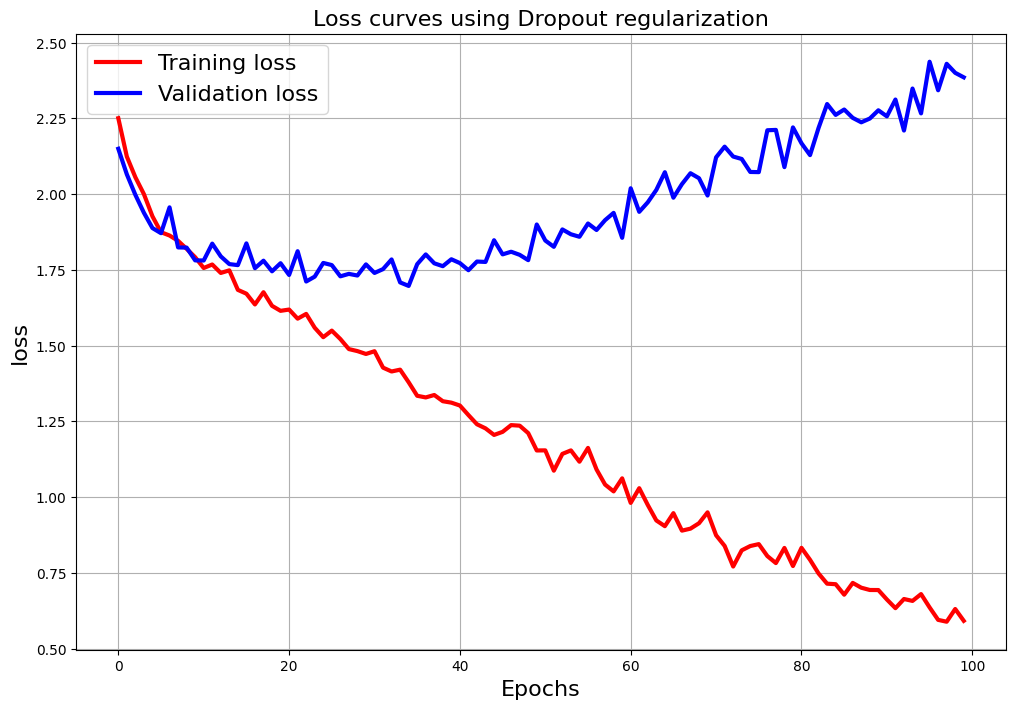

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

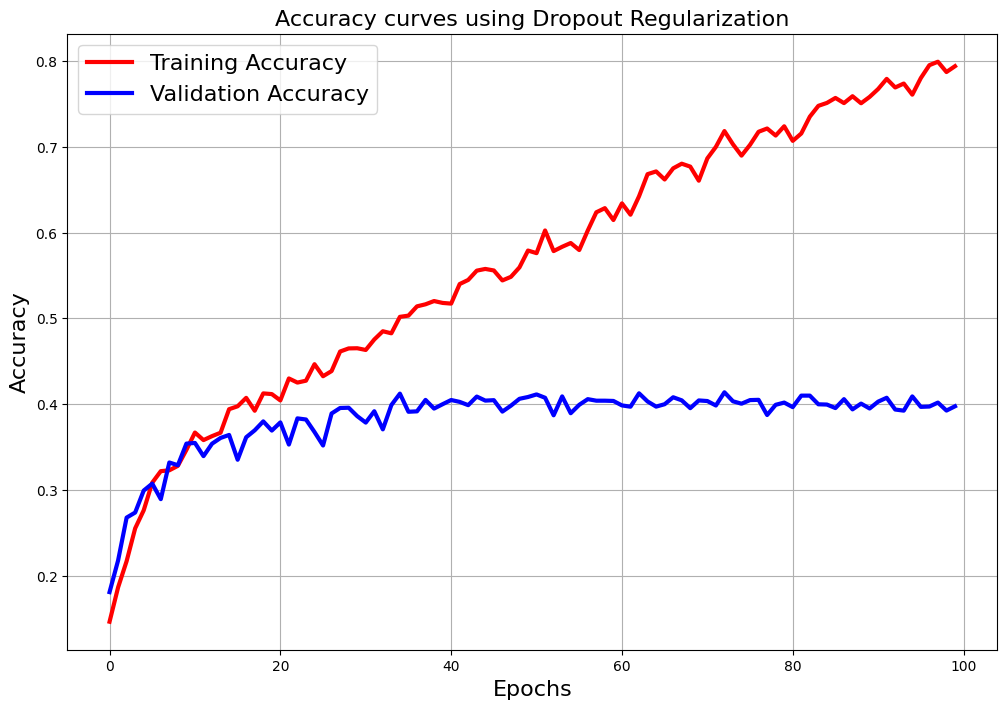

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
model.add(Dropout(0.1))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 438ms/step - accuracy: 0.1182 - loss: 2.3656 - val_accuracy: 0.1860 - val_loss: 2.1423
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.1690 - loss: 2.1390 - val_accuracy: 0.2146 - val_loss: 2.0616
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.2118 - loss: 2.0631 - val_accuracy: 0.2582 - val_loss: 1.9880
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 0.2584 - loss: 2.0123 - val_accuracy: 0.2741 - val_loss: 1.9499
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.2771 - loss: 1.9469 - val_accuracy: 0.2900 - val_loss: 1.9227
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step - accuracy: 0.2949 - loss: 1.9348 - val_accuracy: 0.3049 - val_loss: 1.8767
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.2990 - loss: 1.8903 - val_accuracy: 0.3307 - val_loss: 1.8493
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.3267 - loss: 1.8653 - val

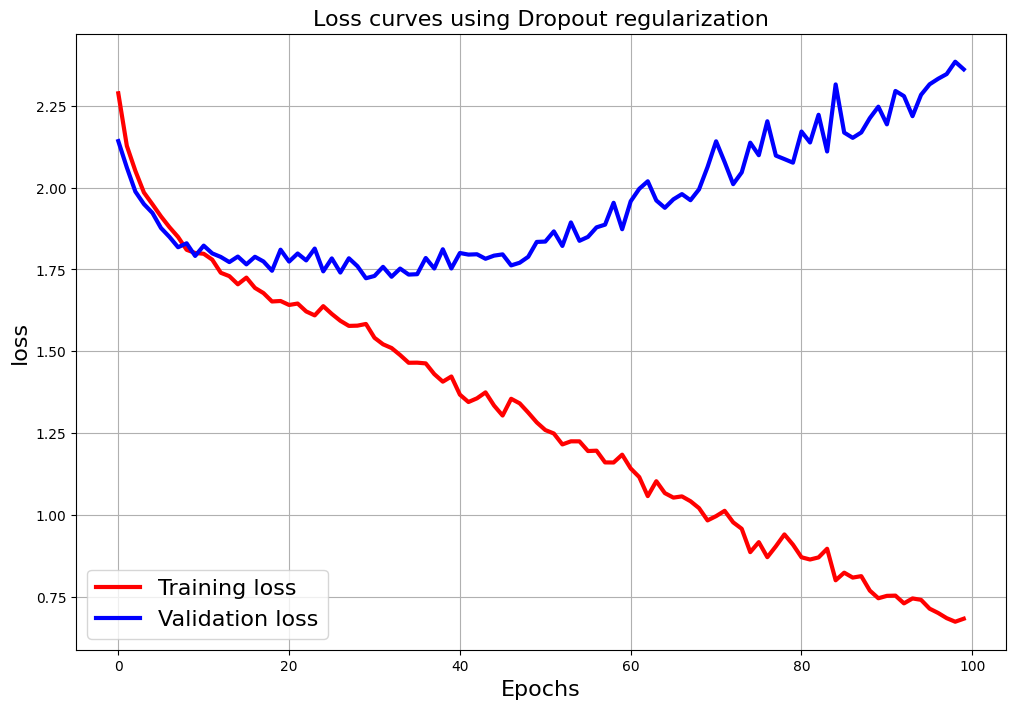

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

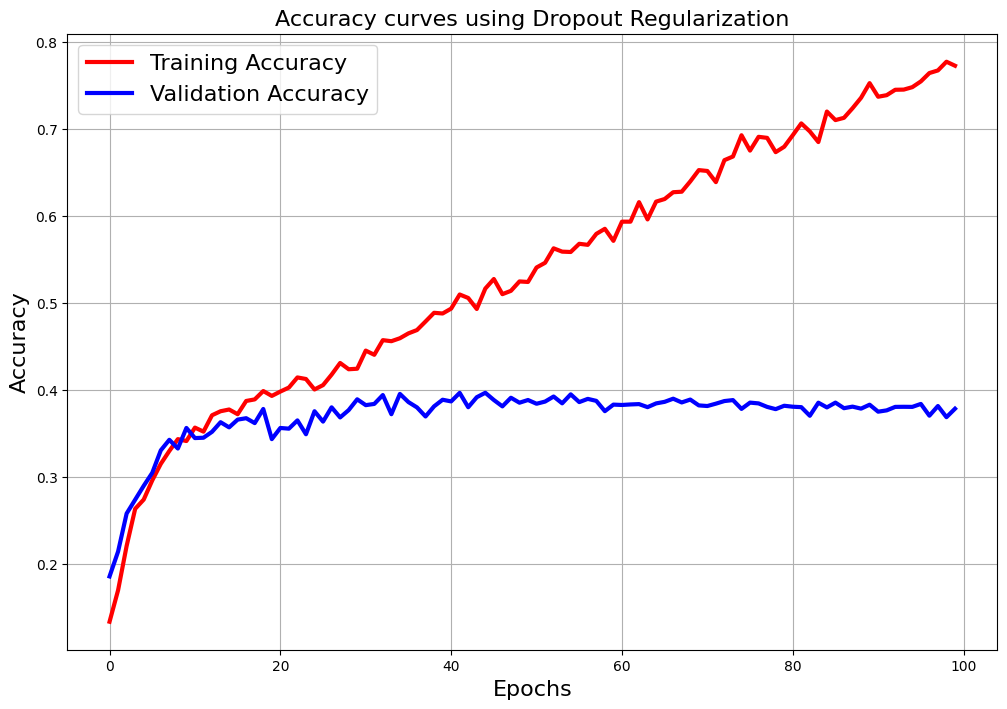

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.1130 - loss: 2.3037 - val_accuracy: 0.1675 - val_loss: 2.1724
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.1614 - loss: 2.1624 - val_accuracy: 0.1707 - val_loss: 2.1231
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.1813 - loss: 2.1210 - val_accuracy: 0.2081 - val_loss: 2.0675
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.2147 - loss: 2.0487 - val_accuracy: 0.2594 - val_loss: 2.0260
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.2425 - loss: 2.0178 - val_accuracy: 0.2684 - val_loss: 1.9418
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.2696 - loss: 1.9507 - val_accuracy: 0.2538 - val_loss: 1.9695
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.2621 - loss: 1.9641 - val_accuracy: 0.2718 - val_loss: 1.9222
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.2822 - loss: 1.9071 - val_a

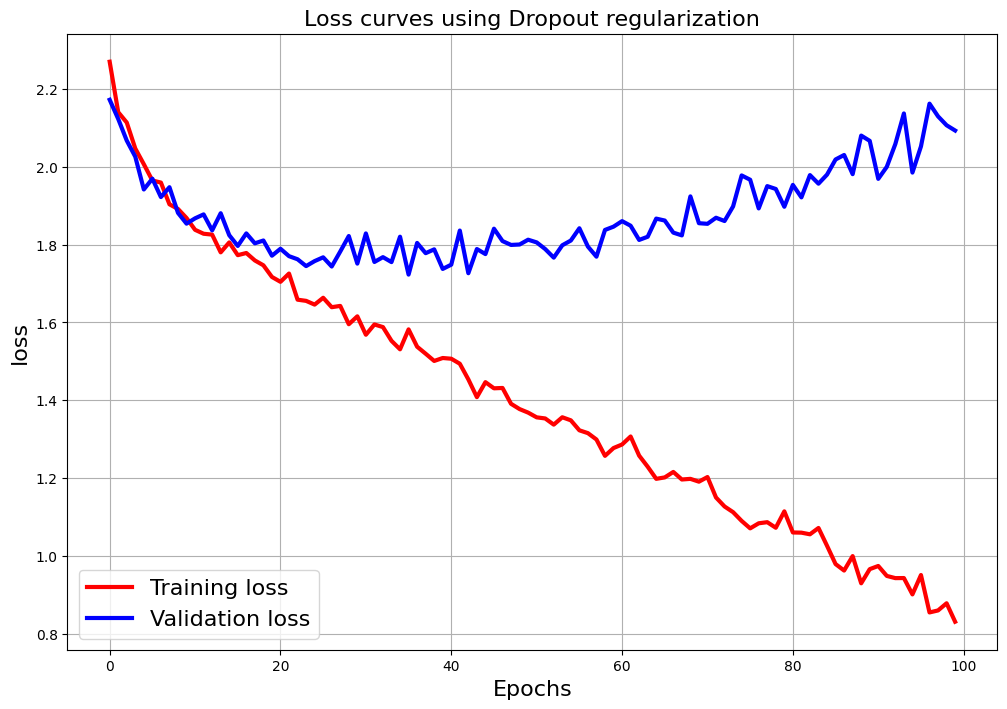

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

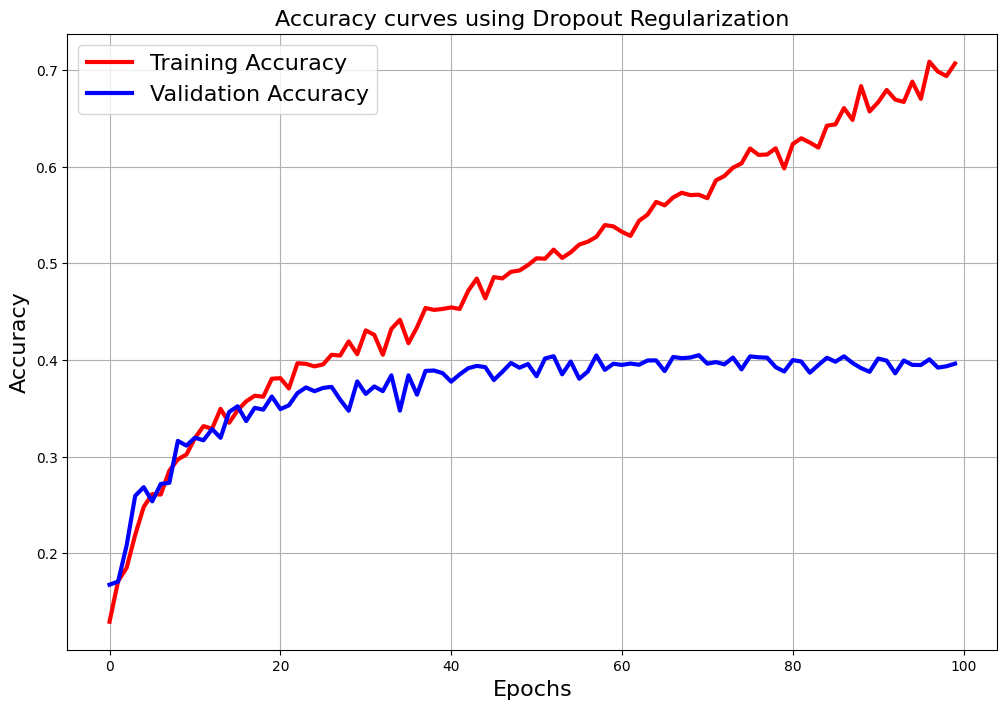

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.0990 - loss: 2.2996 - val_accuracy: 0.1457 - val_loss: 2.2353
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.1611 - loss: 2.1720 - val_accuracy: 0.1741 - val_loss: 2.0935
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.1813 - loss: 2.0909 - val_accuracy: 0.1807 - val_loss: 2.0959
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.1737 - loss: 2.0902 - val_accuracy: 0.1688 - val_loss: 2.0757
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.1817 - loss: 2.0784 - val_accuracy: 0.2122 - val_loss: 2.0328
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.1919 - loss: 2.0526 - val_accuracy: 0.2018 - val_loss: 2.0662
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.2133 - loss: 2.0445 - val_accuracy: 0.2192 - val_loss: 2.0110
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.2210 - loss: 1.9850 - v

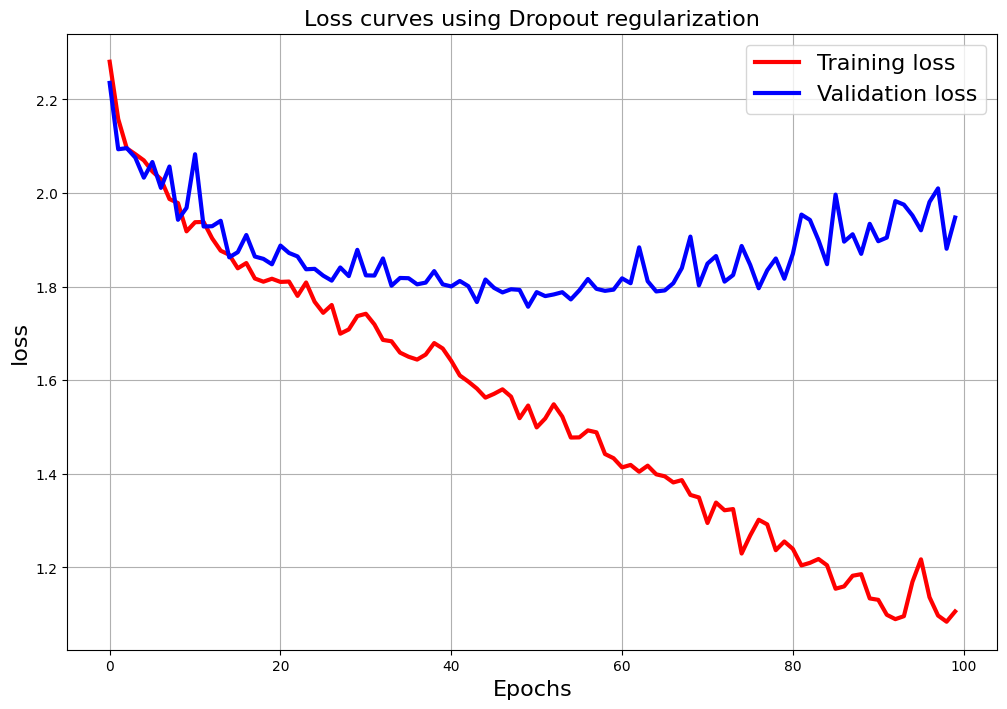

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

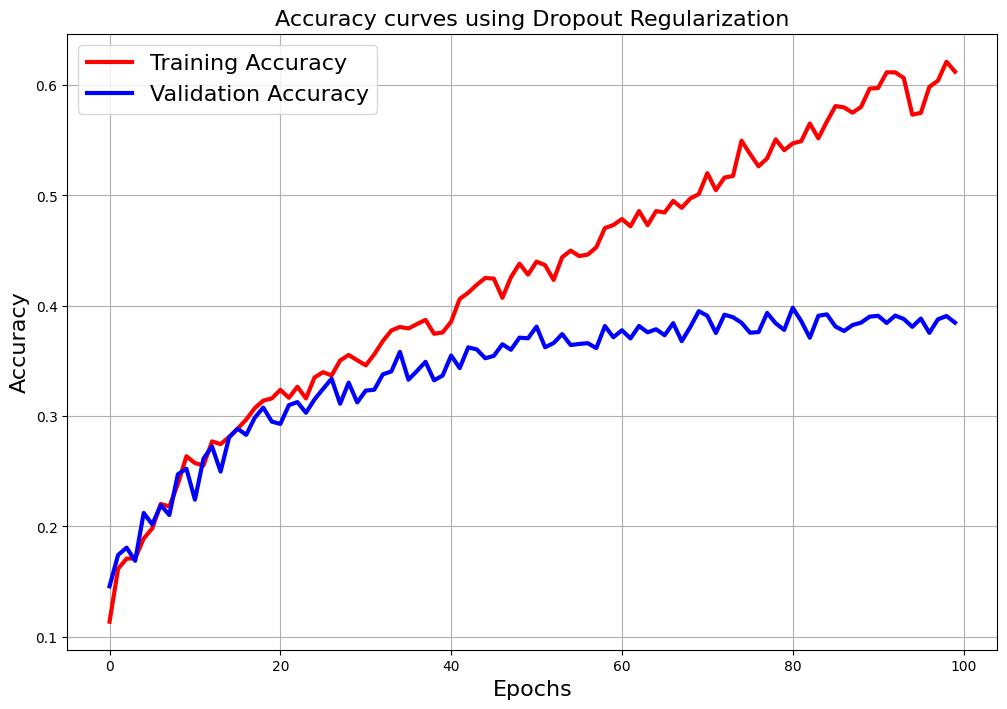

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.1238 - loss: 2.2662 - val_accuracy: 0.1714 - val_loss: 2.0835
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.1704 - loss: 2.0989 - val_accuracy: 0.1943 - val_loss: 2.0446
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.1930 - loss: 2.0501 - val_accuracy: 0.2033 - val_loss: 2.0875
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.2072 - loss: 2.0057 - val_accuracy: 0.2185 - val_loss: 1.9992
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.2221 - loss: 1.9827 - val_accuracy: 0.2543 - val_loss: 1.9531
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.2724 - loss: 1.9001 - val_accuracy: 0.2999 - val_loss: 1.8387
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.2972 - loss: 1.8436 - val_accuracy: 0.3110 - val_loss: 1.8163
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.3106 - loss: 1.8141 - v

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.1024 - loss: 2.3096 - val_accuracy: 0.1491 - val_loss: 2.2135
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.1450 - loss: 2.2255 - val_accuracy: 0.1662 - val_loss: 2.1205
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.1792 - loss: 2.1055 - val_accuracy: 0.1753 - val_loss: 2.1517
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.1794 - loss: 2.0867 - val_accuracy: 0.1919 - val_loss: 2.0769
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.1895 - loss: 2.0755 - val_accuracy: 0.1980 - val_loss: 2.0440
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.2128 - loss: 2.0457 - val_accuracy: 0.2557 - val_loss: 2.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.2395 - loss: 1.9901 - val_accuracy: 0.2745 - val_loss: 1.9374
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 405ms/step - accuracy: 0.2743 - loss: 1.9197 - v

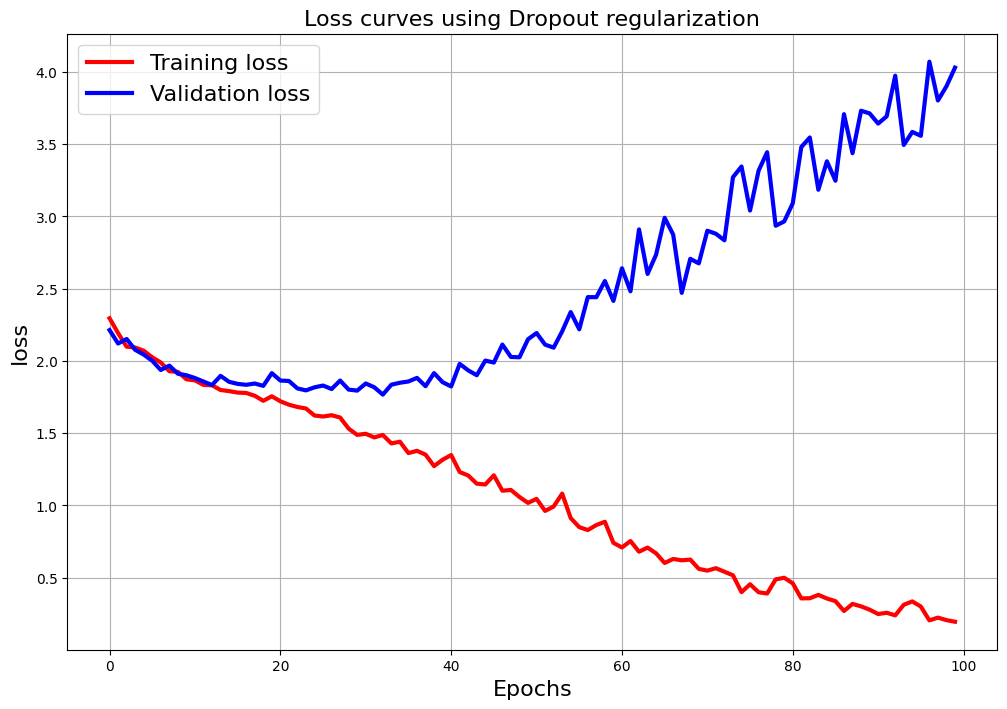

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

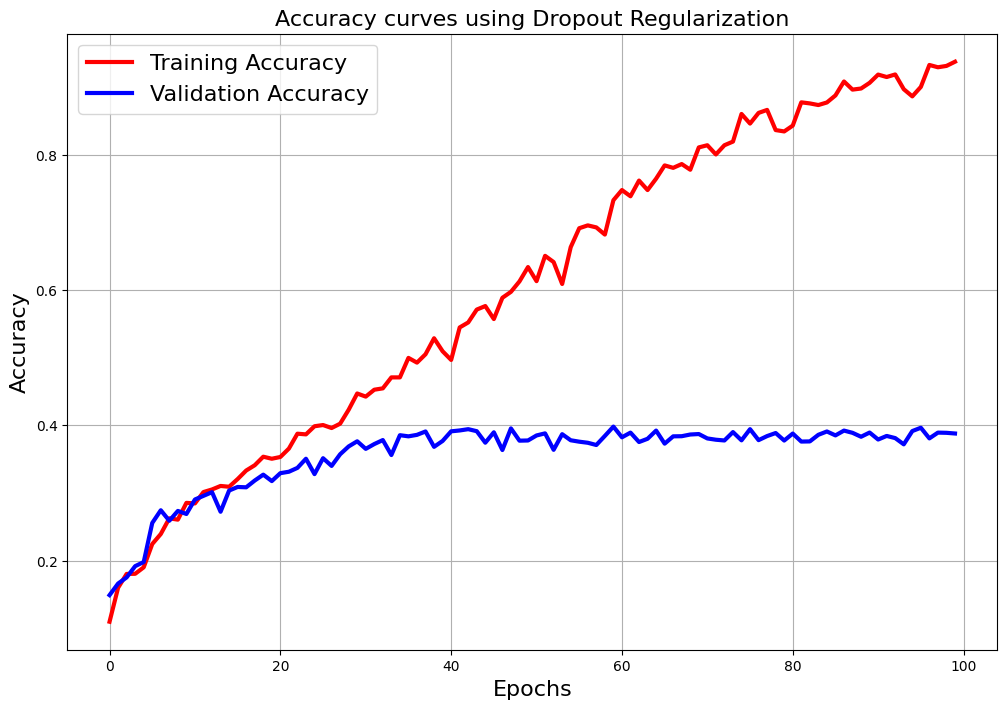

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.0964 - loss: 2.3074 - val_accuracy: 0.1561 - val_loss: 2.2551
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 405ms/step - accuracy: 0.1519 - loss: 2.2189 - val_accuracy: 0.1566 - val_loss: 2.1309
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.1756 - loss: 2.1333 - val_accuracy: 0.1702 - val_loss: 2.0937
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.1742 - loss: 2.1044 - val_accuracy: 0.1861 - val_loss: 2.0748
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.1723 - loss: 2.0729 - val_accuracy: 0.1824 - val_loss: 2.0746
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.1808 - loss: 2.0558 - val_accuracy: 0.1797 - val_loss: 2.1037
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.1868 - loss: 2.0832 - val_accuracy: 0.1877 - val_loss: 2.2017
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.1908 - loss: 2.0777 - val

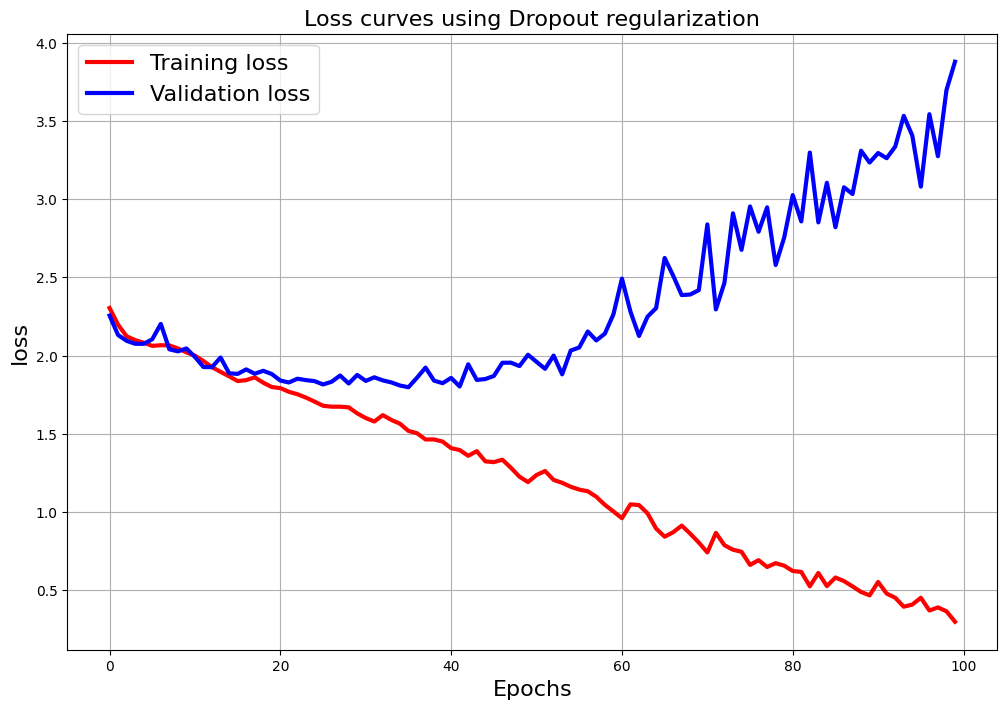

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

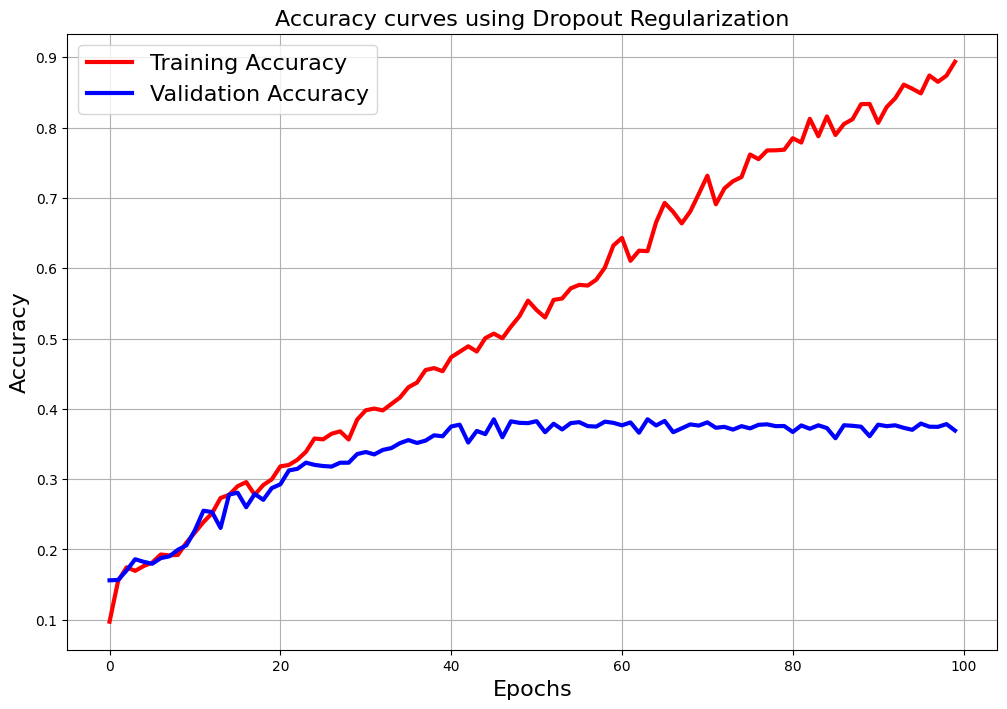

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.1030 - loss: 2.3015 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.1020 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.1084 - loss: 2.3024 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.1032 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.0991 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.1003 - loss: 2.3025 - val_a

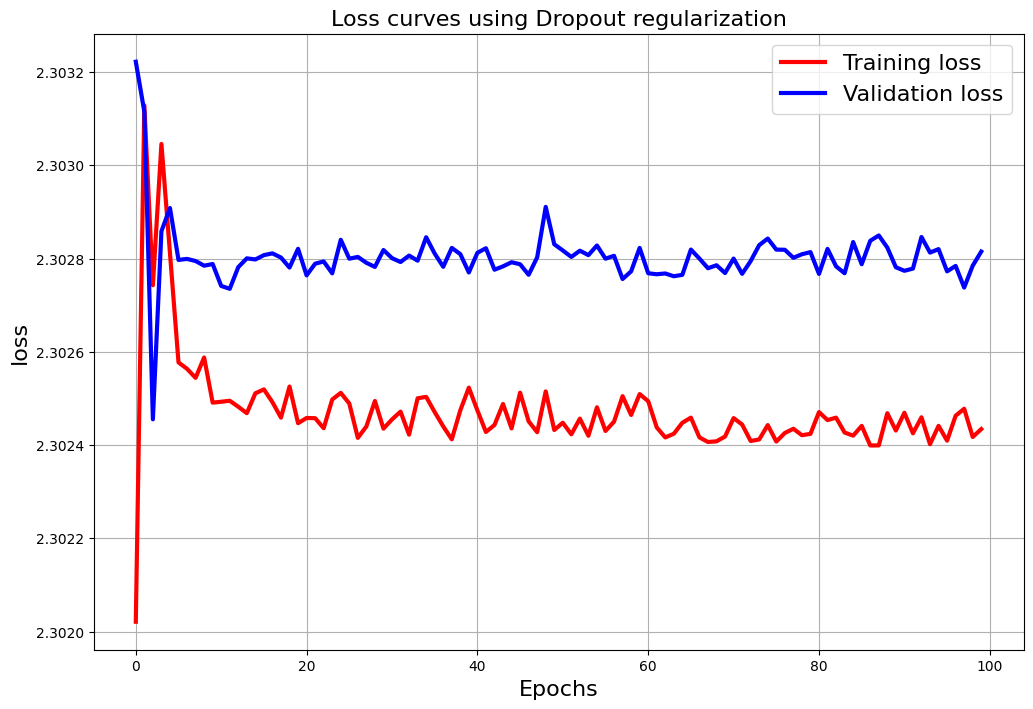

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

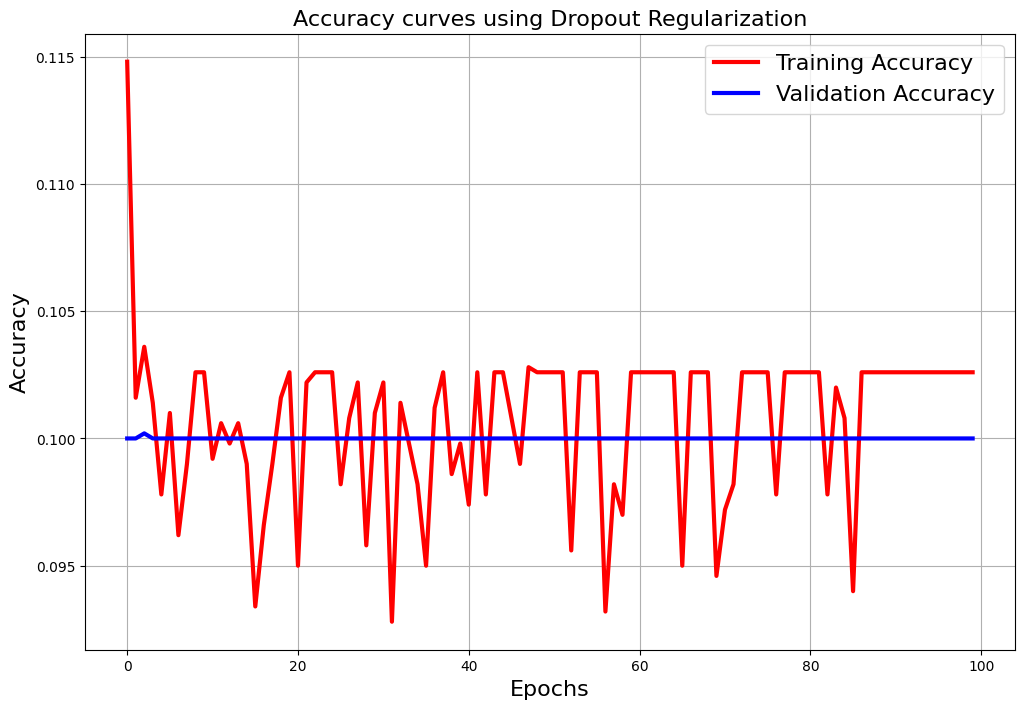

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 444ms/step - accuracy: 0.0978 - loss: 2.3041 - val_accuracy: 0.1052 - val_loss: 2.3026
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - accuracy: 0.1006 - loss: 2.3025 - val_accuracy: 0.1459 - val_loss: 2.2968
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.1206 - loss: 2.2967 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.1001 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step - accuracy: 0.1005 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 482ms/step - accuracy: 0.0918 - loss: 2.3024 - val_accuracy: 0.1022 - val_loss: 2.3012
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.1031 - loss: 2.3016 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.0994 - loss: 2.3030 - val_a

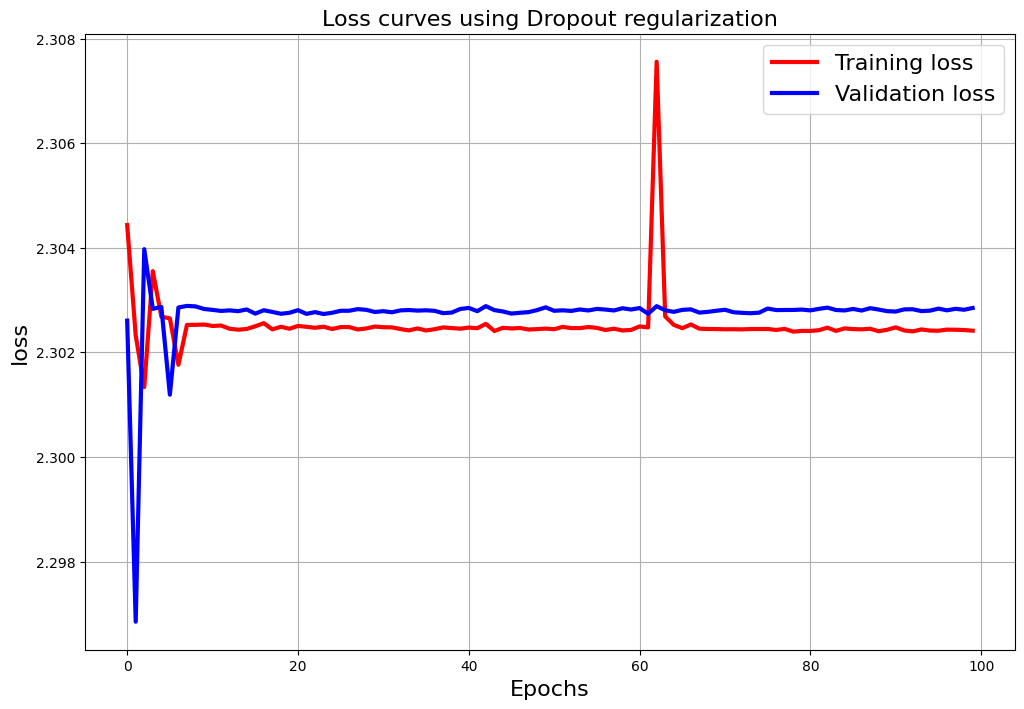

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

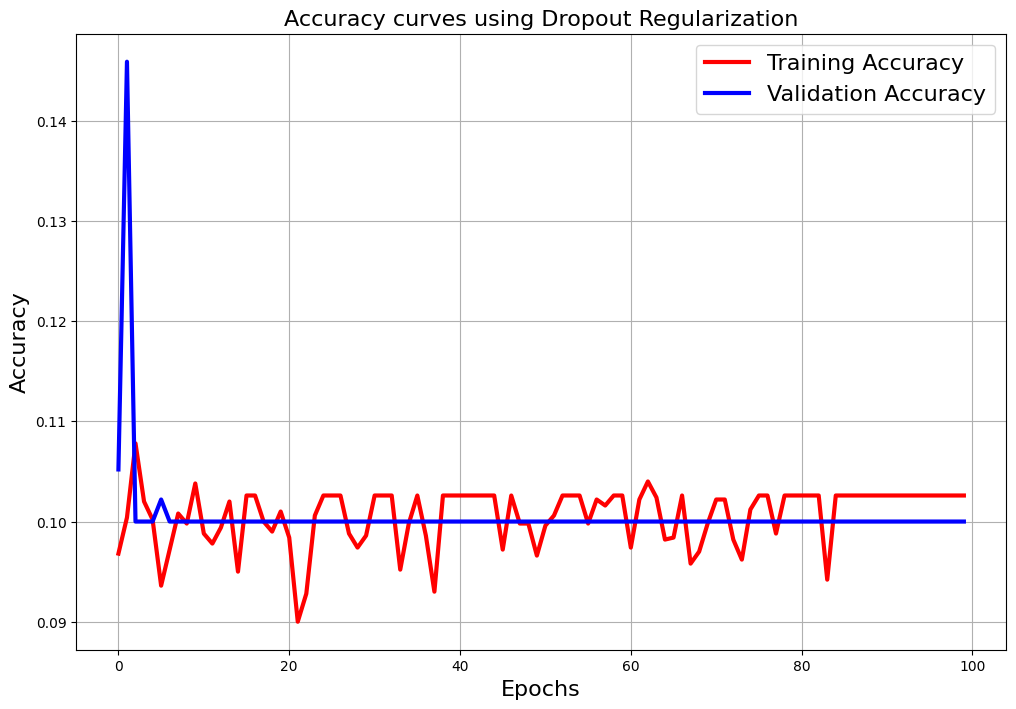

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 371ms/step - accuracy: 0.1025 - loss: 2.3050 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 411ms/step - accuracy: 0.1030 - loss: 2.3029 - val_accuracy: 0.1008 - val_loss: 2.3017
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.0981 - loss: 2.3166 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.1021 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.1097 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - accuracy: 0.1115 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.1048 - loss: 2.3024 - va

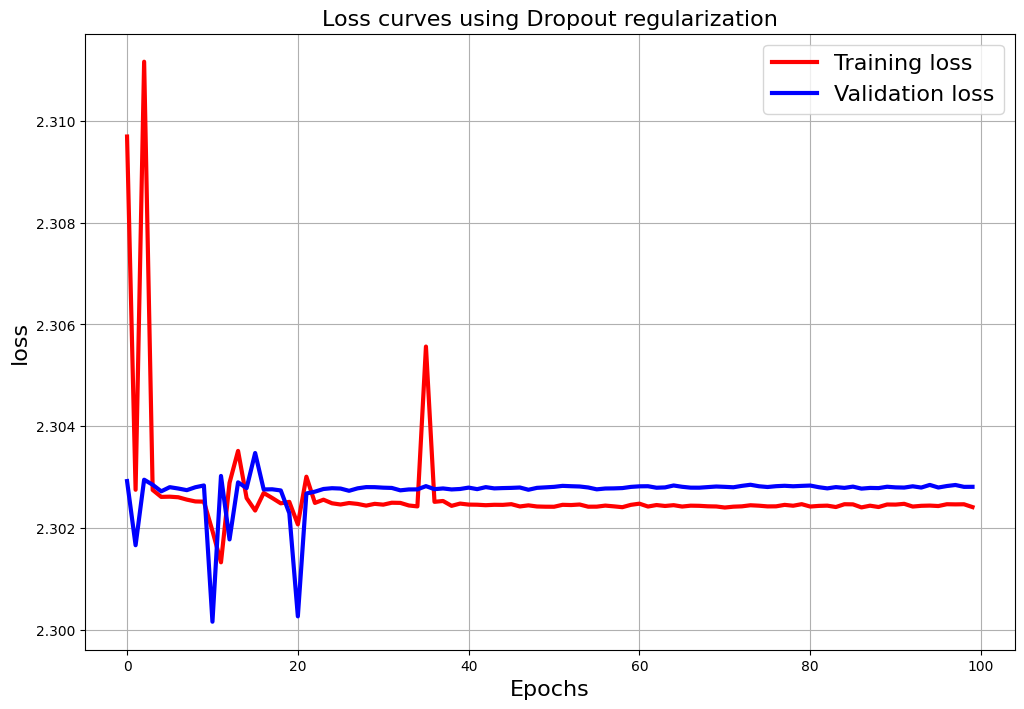

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

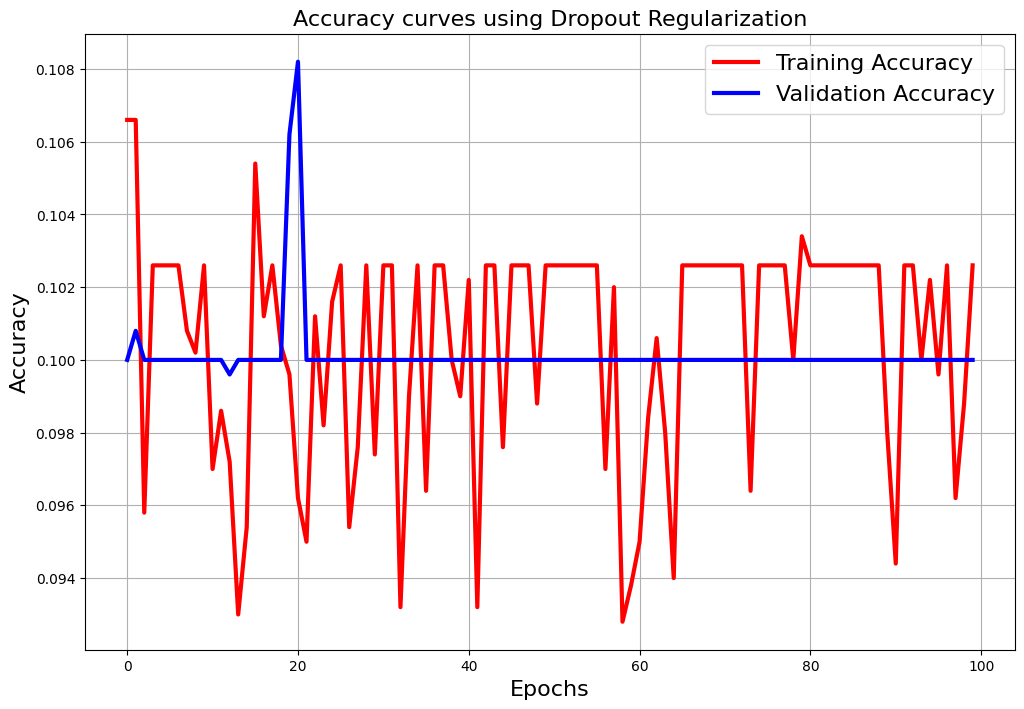

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.1040 - loss: 2.2979 - val_accuracy: 0.1486 - val_loss: 2.4869
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.1191 - loss: 2.3086 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 428ms/step - accuracy: 0.1028 - loss: 2.3001 - val_accuracy: 0.0998 - val_loss: 2.3021
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - accuracy: 0.1217 - loss: 2.2839 - val_accuracy: 0.1571 - val_loss: 2.1986
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.1560 - loss: 2.1627 - val_accuracy: 0.1705 - val_loss: 2.0976
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.1590 - loss: 2.1020 - val_accuracy: 0.1790 - val_loss: 2.0838
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.1781 - loss: 2.0865 - val_accuracy: 0.1856 - val_loss: 2.0607
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.1823 - loss: 2.0668 - val_a

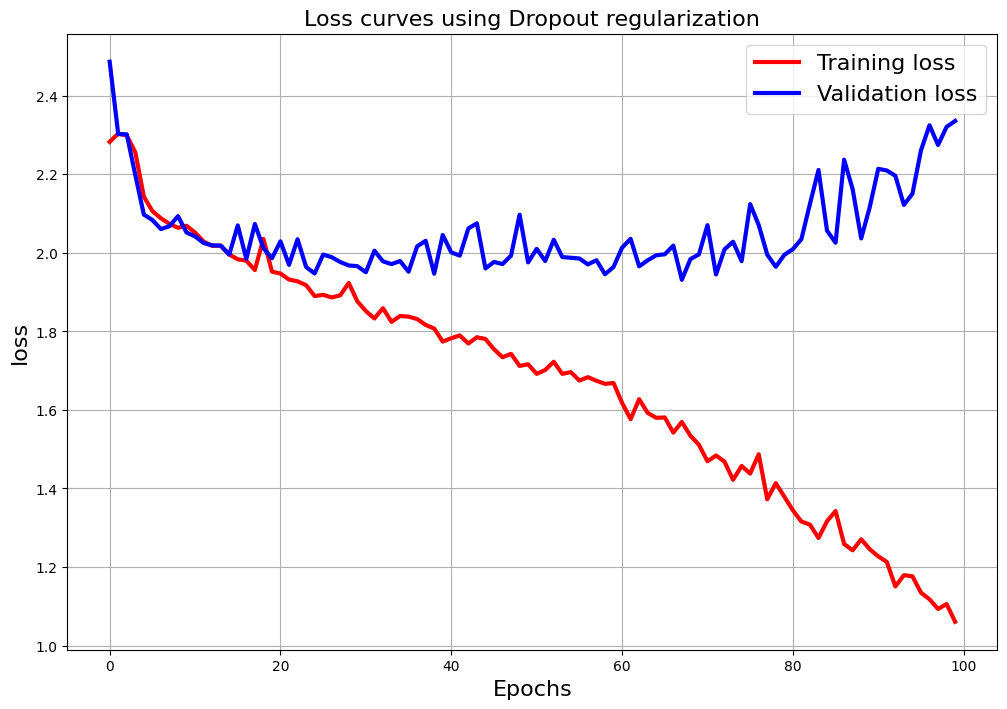

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

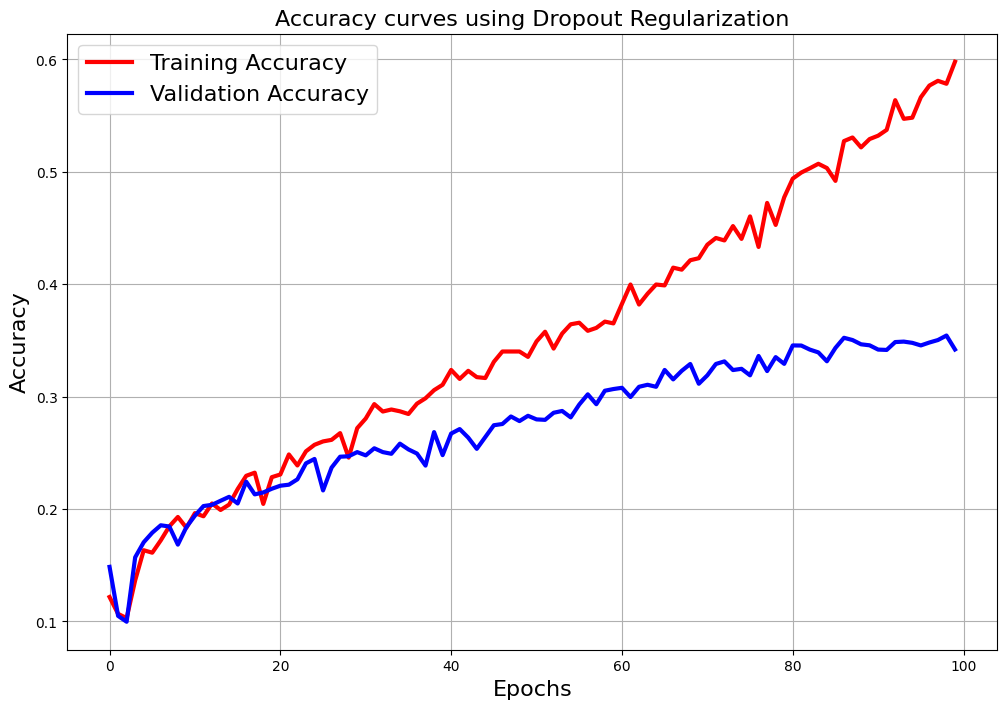

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [ ]:
# from keras.layers import Dropout, Input, Dense

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=[dim_array,]))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converting labels to one-hot encoding form
# from tensorflow.keras.utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=200, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.0934 - loss: 2.2997 - val_accuracy: 0.1119 - val_loss: 2.3017
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.1250 - loss: 2.2866 - val_accuracy: 0.1727 - val_loss: 2.1701
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.1640 - loss: 2.1606 - val_accuracy: 0.1826 - val_loss: 2.1171
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.1798 - loss: 2.0924 - val_accuracy: 0.1841 - val_loss: 2.0807
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.1824 - loss: 2.0850 - val_accuracy: 0.1811 - val_loss: 2.1351
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.1852 - loss: 2.0886 - val_accuracy: 0.1901 - val_loss: 2.0587
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.1985 - loss: 2.0531 - val_accuracy: 0.1932 - val_loss: 2.0549
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.2057 - loss: 2.0538 - val_

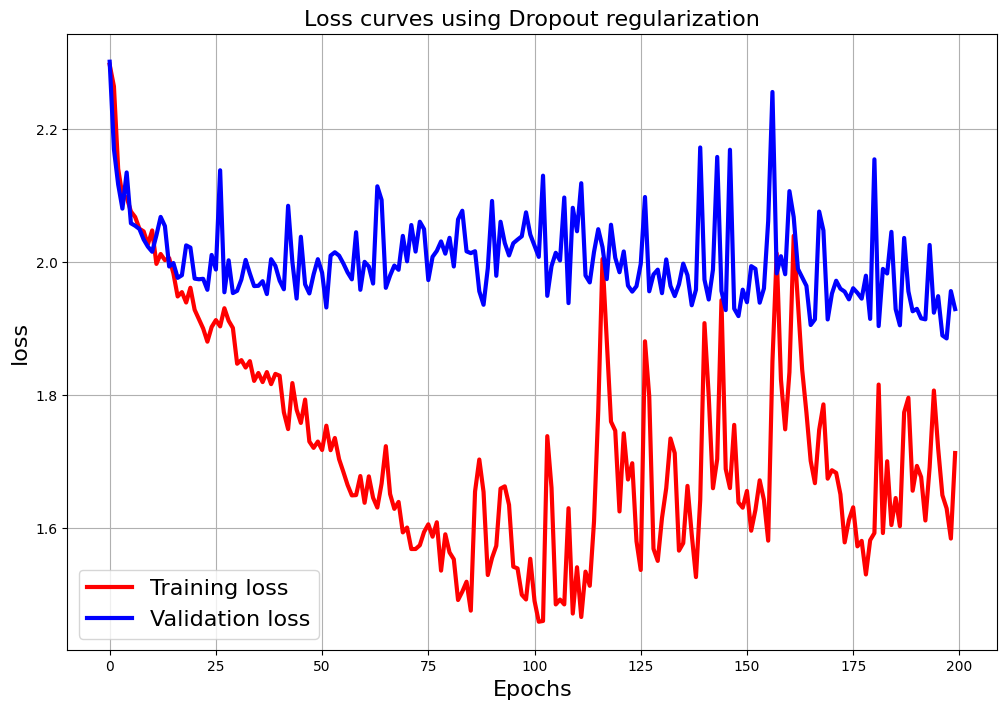

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

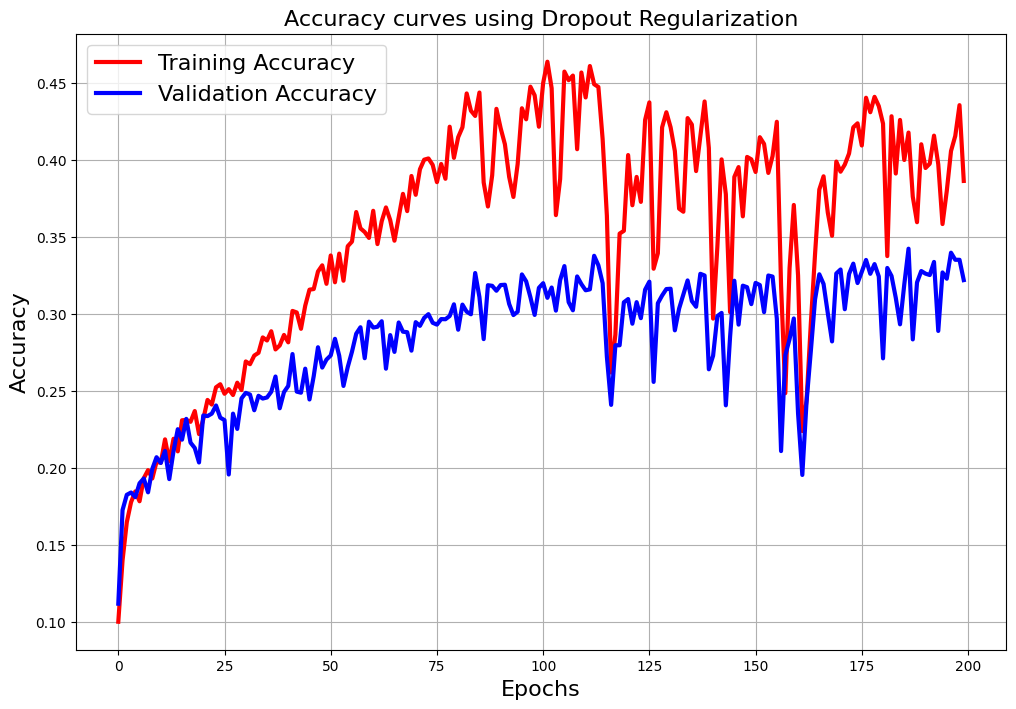

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()